## Arrays

Lists in Python do not need to be cast a particular type of object such as float, string, or object. This makes programming in Python relatively simple. Lists in Python are dynamic, meaning that they are not fixed in size. This comes with the drawback that execution time is slower than it otherwise could be.

Although it is a library in Python, numpy functions are programmed in C++. The numpy library solves this problem by creating arrays that contain data types that are values. These include integers and a variety of floats. Both of these aspects contribute to a substantial increase in efficiency for computation performed using numby arrays instead of dynamic lists.

There are a number of ways to create a numpy array. The easiest is simply to convert a python list using the command array.

In [1]:
#numpyArray.py
# import the numpy library
import numpy as np

array = np.array([1,2,3,4,5])
array

array([1, 2, 3, 4, 5])

Each element in the array is indexed, starting at 0

In [2]:
print(array[0])
print(array[1])
print(array[4])

1
2
5


In [3]:
print(array[0] + array[4])

6


## Quick lesson on for loops

For loops are used to call each element in a list, dictionary, or string one at a time.

In [4]:
for val in array:
    print(val)
    
print()
for val in array:
    print(val ** 2)

1
2
3
4
5

1
4
9
16
25


# Creating Simulation with Probability Distribtuion

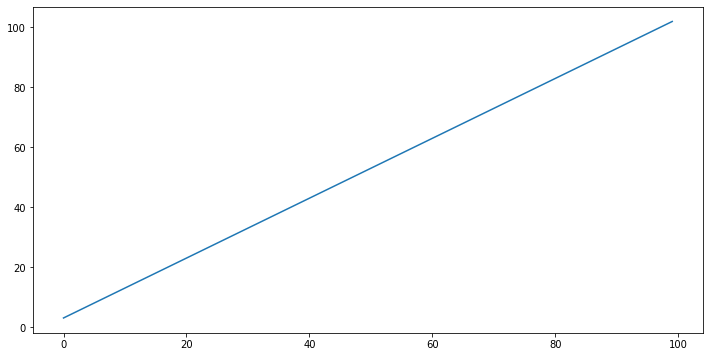

In [5]:
# import modules
import numpy as np 
import matplotlib.pyplot as plt

# create an array using a generator function
# This will hold data that will represent the mean values
# for the distribution that we draw from
# this line has a y intercept of 3 and a slope of 1
# y = x +3 for all x from 0 to 99   [i.e., 100 - 1]
line = np.array([(1) * x + 3 for x in range(100)])

# create a new figure
# This figure will hold onlly 1 plot (i.e., 1 axis pair)
# . . . figsize = (x, y) -- determine dimensions of figure
figure = plt.figure(figsize = (12, 6))
# plt.plot will plot a line
plt.plot(line)
plt.show()

Next we will create a list of points. These points will be drawn from a random distribution whose mean is equal to the value of the line for a given index

In [6]:
import random

# create a list to hold random points
# each index for the list will match the index for 
#      the array holding the line data
points = []
for point in line:
    # normalvariate(mean, sigma)
    mean = point
    sigma = 5
    # append random value to the end of the list
    points.append(random.normalvariate(mean, sigma))

x_values = np.arange(len(points))

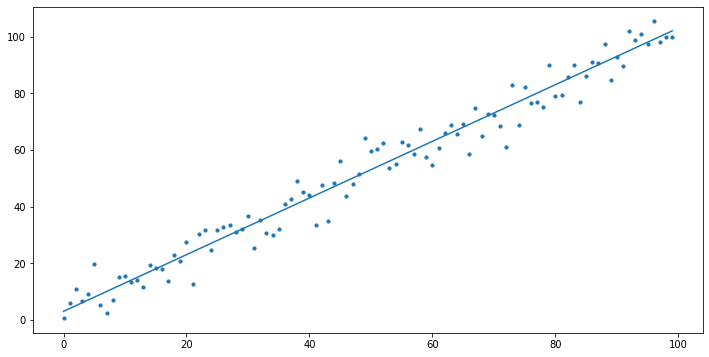

In [7]:
figure = plt.figure(figsize = (12, 6))
# plt.plot will plot a line
plt.plot(line)

# scatter(x_values, y_values, . . . )
plt.scatter(x_values, points, s=10)
plt.show()

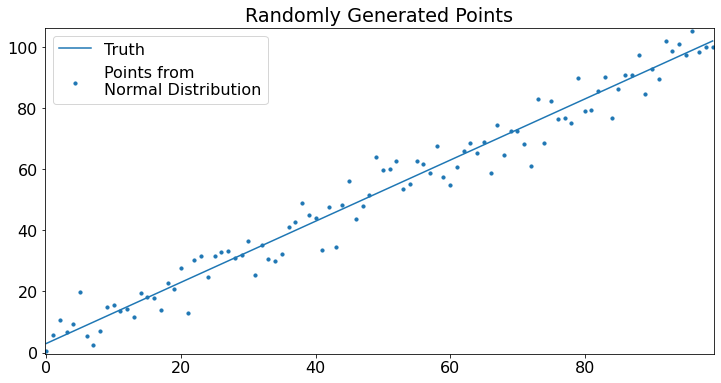

In [8]:
plt.rcParams["axes.xmargin"] = .0025
plt.rcParams["axes.ymargin"] = .01
plt.rcParams.update({"font.size" : 16})

figure = plt.figure(figsize = (12, 6))
# plt.plot will plot a line
plt.plot(line, label = "Truth")
# scatter(x_values, y_values, . . . )
plt.scatter(x_values, 
            points, 
            s=10, 
            label = "Points from\nNormal Distribution")
plt.legend(loc="upper left")
plt.title("Randomly Generated Points")
plt.show()

Next, we will create estimate a line using the statsmodels library in Python. Among other tools, statsmodels provides an OLS Regression function.

In [9]:
import pandas as pd
# pass a list of lists to pd.DataFrame()
# each list is interpreted as a column of data
df_for_OLS = pd.DataFrame([x_values,points]).T
df_for_OLS.rename(columns={0:"X", 1: "Random Points"}, 
                  inplace=True)
df_for_OLS

,X,Random Points
0,0.0,0.656305
1,1.0,5.851379
2,2.0,10.819456
3,3.0,6.630250
4,4.0,9.199468
5,5.0,19.718494
6,6.0,5.311662
7,7.0,2.426964
8,8.0,7.110114
9,9.0,15.059656


In [10]:
import statsmodels.api as sm  
y_var = ["Random Points"]
x_var = ["X"]

y = df_for_OLS[y_var]
X = df_for_OLS[x_var]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Random Points   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2917.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           9.97e-75
Time:                        11:02:39   Log-Likelihood:                -307.43
No. Observations:                 100   AIC:                             618.9
Df Residuals:                      98   BIC:                             624.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.9894      0.018     54.007      0.000       0.953       1.026
Constant       3.3480      1.050      3.189      0.002       1.265       5.431
==============================================================================
Omnibus:                        1.175   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.248
Skew:                          -0.241   Prob(JB):                        0.536
Kurtosis:                       2.743   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

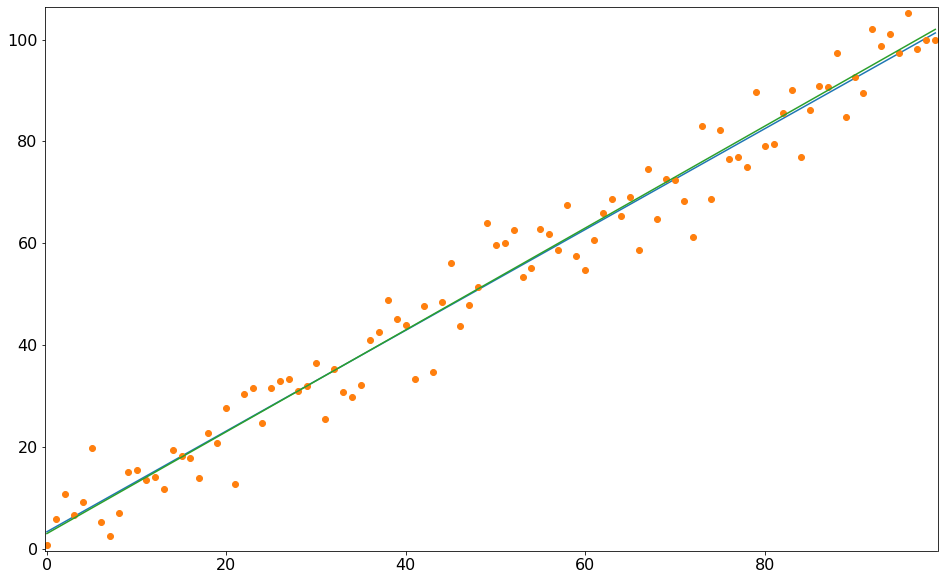

In [11]:
predictor =results.predict()
fig, ax = plt.subplots(figsize=(16,10))
plt.plot(predictor)
plt.plot(points,ls = "", marker="o")
plt.plot(line)
plt.show()
plt.close()

In [12]:
df_for_OLS["Predicted Line"] = predictor
df_for_OLS["Original Line"] = line

# calculate residuals by subtracting the predictor values
# from the observation
df_for_OLS["Residuals"] = df_for_OLS["Random Points"].sub(
    df_for_OLS["Predicted Line"])
# Or calculate residuals using statsmodels
# df_for_OLS["Residuals"] = results.resid
df_for_OLS["Normalized Residuals"] = results.resid_pearson
df_for_OLS

,X,Random Points,Predicted Line,Original Line,Residuals,Normalized Residuals
0,0.0,0.656305,3.347970,3,-2.691666,-0.509021
1,1.0,5.851379,4.337321,4,1.514058,0.286324
2,2.0,10.819456,5.326671,5,5.492785,1.038741
3,3.0,6.630250,6.316021,6,0.314228,0.059424
4,4.0,9.199468,7.305372,7,1.894096,0.358193
5,5.0,19.718494,8.294722,8,11.423772,2.160350
6,6.0,5.311662,9.284072,9,-3.972410,-0.751223
7,7.0,2.426964,10.273422,10,-7.846459,-1.483844
8,8.0,7.110114,11.262773,11,-4.152658,-0.785310
9,9.0,15.059656,12.252123,12,2.807533,0.530933


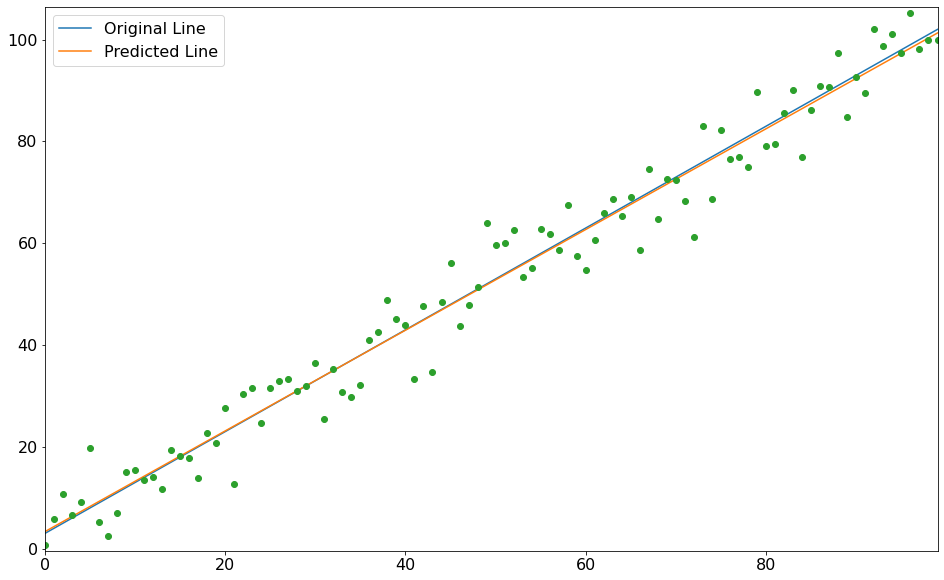

,X,Random Points,Predicted Line,Original Line,Residuals,Normalized Residuals
0,0.0,0.656305,3.347970,3,-2.691666,-0.509021
1,1.0,5.851379,4.337321,4,1.514058,0.286324
2,2.0,10.819456,5.326671,5,5.492785,1.038741
3,3.0,6.630250,6.316021,6,0.314228,0.059424
4,4.0,9.199468,7.305372,7,1.894096,0.358193
5,5.0,19.718494,8.294722,8,11.423772,2.160350
6,6.0,5.311662,9.284072,9,-3.972410,-0.751223
7,7.0,2.426964,10.273422,10,-7.846459,-1.483844
8,8.0,7.110114,11.262773,11,-4.152658,-0.785310
9,9.0,15.059656,12.252123,12,2.807533,0.530933


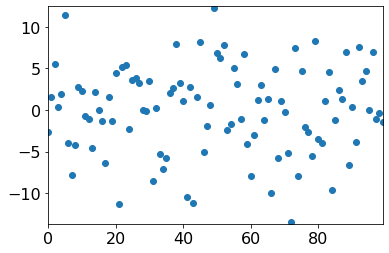

In [13]:
fig, ax = plt.subplots(figsize = (16,10))
df_for_OLS[["Original Line", "Predicted Line"]].plot.line(ax = ax)
df_for_OLS["Random Points"].plot.line(ls = "", marker = "o",
                                     ax = ax)
plt.show()
plt.close()

df_for_OLS["Residuals"].plot(ls="", marker = "o")
df_for_OLS

## Monte Carlo Simulation

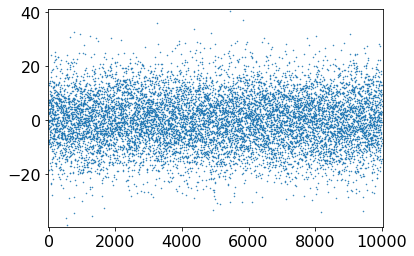

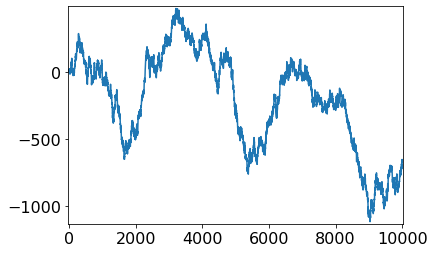

In [14]:
# montecarlo simulation
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
import random  

random_list = []
mean = 0
sigma = 10
num_observations = 10000
markersize = 1

for i in range(num_observations):
    random_list.append(random.normalvariate(mean, sigma))
    # ls = "" --> don't plot line
    # marker = "." --> plot points as scatter plot
plt.plot(random_list, ls = "", marker = ".", markersize = markersize)
plt.show()
plt.close()

## compile all of the random points
# sum each points starting from index 0 to create a line 
# changes in y values are randomly generated

# we are going to cycle through each index value
# in the list, adding the random value at index i,
# to the previous sum already calculated
simulation = []
for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        simulation.append(simulation[i - 1] + val)
    

plt.plot(simulation)
plt.show()
plt.close()